In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 150
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df=pd.read_csv('Housing.csv')

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
df.duplicated().sum() #dublicates

0

In [17]:
df['mainroad']=df['mainroad'].replace(to_replace=['no', 'yes'], value=[0, 1]).astype(int)

In [19]:
df['guestroom']=df['guestroom'].replace(to_replace=['no', 'yes'], value=[0, 1]).astype(int)

In [21]:
df['basement']=df['basement'].replace(to_replace=['no', 'yes'], value=[0, 1]).astype(int)

In [23]:
df['hotwaterheating']=df['hotwaterheating'].replace(to_replace=['no', 'yes'], value=[0, 1]).astype(int)

In [25]:
df['airconditioning']=df['airconditioning'].replace(to_replace=['no', 'yes'], value=[0, 1]).astype(int)

In [27]:
df['prefarea']=df['prefarea'].replace(to_replace=['no', 'yes'], value=[0, 1]).astype(int)

In [41]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [53]:
df=pd.get_dummies(df).astype(int)

In [55]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int32
 1   area                             545 non-null    int32
 2   bedrooms                         545 non-null    int32
 3   bathrooms                        545 non-null    int32
 4   stories                          545 non-null    int32
 5   mainroad                         545 non-null    int32
 6   guestroom                        545 non-null    int32
 7   basement                         545 non-null    int32
 8   hotwaterheating                  545 non-null    int32
 9   airconditioning                  545 non-null    int32
 10  parking                          545 non-null    int32
 11  prefarea                         545 non-null    int32
 12  furnishingstatus_furnished       545 non-null    i

In [59]:
df.shape

(545, 15)

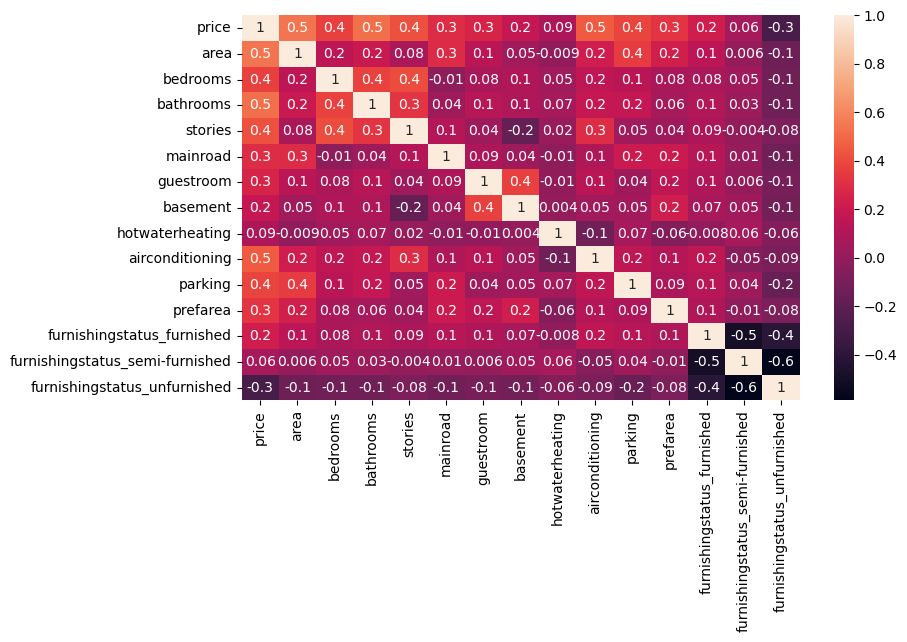

In [61]:
plt.figure(figsize = (9,5))
sns.heatmap(df.corr(),annot = True, fmt='.1g')
plt.show()